<a href="https://colab.research.google.com/github/Mingze-L/Final-project/blob/main/result_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#connect to the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#set the directory
%cd /content/gdrive/MyDrive/FinalProject/

/content/gdrive/MyDrive/FinalProject


In [3]:
import pandas as pd
# load the prediction output from each model
LSTM_fm = pd.read_csv('LSTM_fm.csv')
LSTM_m = pd.read_csv('LSTM_m.csv')
LSTM_t = pd.read_csv('LSTM_t.csv')

biLSTM_fm = pd.read_csv('biLSTM_fm.csv')
biLSTM_m = pd.read_csv('biLSTM_m.csv')
biLSTM_t = pd.read_csv('biLSTM_t.csv')

LTSF_fm = pd.read_csv('LTSF_fm.csv')
LTSF_m = pd.read_csv('LTSF_m.csv')
LTSF_t = pd.read_csv('LTSF_t.csv')

LTSF_D_fm = pd.read_csv('LTSF_D_fm.csv')
LTSF_D_m = pd.read_csv('LTSF_D_m.csv')
LTSF_D_t = pd.read_csv('LTSF_D_t.csv')

autoformer_fm = pd.read_csv('autoformer_fm_2.csv')
autoformer_m = pd.read_csv('autoformer_m_2.csv')
autoformer_t = pd.read_csv('autoformer_t_2.csv')

ARIMA = pd.read_csv('ARIMA.csv')

# load the data contain real value
fm_params = pd.read_csv('fm_params.csv')
m_params = pd.read_csv('m_params.csv')
t_params = pd.read_csv('t_params.csv')
df = pd.read_csv('output.csv')

## log q

In [6]:
column_classes = df.dtypes
print(column_classes)

Unnamed: 0     int64
Year           int64
Age           object
Female        object
Male          object
Total         object
dtype: object


In [7]:
df = df[~((df['Female'] == '.') | (df['Male'] == '.') | (df['Total'] == '.'))]
df['Female'] = df['Female'].astype(float)
df['Male'] = df['Male'].astype(float)
df['Total'] = df['Total'].astype(float)
df['Age'] = df['Age'].str.replace('+', '',regex=False).astype(int)
column_classes = df.dtypes
print(column_classes)

Unnamed: 0      int64
Year            int64
Age             int64
Female        float64
Male          float64
Total         float64
dtype: object


<ipython-input-7-a95397b2f36b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Female'] = df['Female'].astype(float)
<ipython-input-7-a95397b2f36b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Male'] = df['Male'].astype(float)
<ipython-input-7-a95397b2f36b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [8]:
# remove the the age that has missing value
df = df[(df['Age'] != 105) & (df['Age'] != 106) & (df['Age'] != 107) & (df['Age'] != 108) & (df['Age'] != 109) & (df['Age'] != 110)]

In [9]:
# generate the logit q(t,x)
import numpy as np
df['Female_q'] = 1-np.exp(-df['Female'])
df['Male_q'] = 1-np.exp(-df['Male'])
df['Total_q'] = 1- np.exp(-df['Total'])

def compute_logit(probability):
    return np.log(probability / (1 - probability))

epsilon = 1e-20
df['Female_log'] =compute_logit(df['Female_q']+epsilon)
df['Male_log'] = compute_logit(df['Male_q']+epsilon)
df['Total_log'] = compute_logit(df['Total_q']+epsilon)

In [10]:
#Train set
split_index_fm = int(len(fm_params) * 0.8)
split_index_m = int(len(m_params) * 0.8)
split_index_t = int(len(t_params) * 0.8)

fm = fm_params[:split_index_fm]
m = m_params[:split_index_m]
t = t_params[:split_index_t]

split_index_fm_v = int(len(fm) * 0.8)
split_index_m_v = int(len(m) * 0.8)
split_index_t_v = int(len(t) * 0.8)

train_fm = fm[:split_index_fm_v]
train_m = m[:split_index_m_v]
train_t = t[:split_index_t_v]

#Validation set
valid_fm = fm[split_index_fm_v:]
valid_m = m[split_index_m_v:]
valid_t = t[split_index_t_v:]

#Test set
test_fm = fm_params[split_index_fm:]
test_m = m_params[split_index_m:]
test_t = t_params[split_index_t:]

In [11]:
LSTM_fm['Real'] = test_fm['K2'].values
LSTM_m['Real'] = test_m['K2'].values
LSTM_t['Real'] = test_t['K2'].values

In [12]:
biLSTM_fm['Real'] = test_fm['K2'].values
biLSTM_m['Real'] = test_m['K2'].values
biLSTM_t['Real'] = test_t['K2'].values

LTSF_fm['Real'] = test_fm['K2'].values
LTSF_m['Real'] = test_m['K2'].values
LTSF_t['Real'] = test_t['K2'].values

LTSF_D_fm['Real'] = test_fm['K2'].values
LTSF_D_m['Real'] = test_m['K2'].values
LTSF_D_t['Real'] = test_t['K2'].values

autoformer_fm['Real'] = test_fm['K2'].values
autoformer_m['Real'] = test_m['K2'].values
autoformer_t['Real'] = test_t['K2'].values

In [13]:
ARIMA['Real_fm'] = test_fm['K2'].values
ARIMA['Real_m'] = test_m['K2'].values
ARIMA['Real_t'] = test_t['K2'].values

In [14]:
LSTM_fm['Year'] = test_fm['Year'].values
LSTM_fm['K1'] = test_fm['K1'].values
LSTM_m['Year'] = test_m['Year'].values
LSTM_m['K1'] = test_m['K1'].values
LSTM_t['Year'] = test_t['Year'].values
LSTM_t['K1'] = test_t['K1'].values

biLSTM_fm['Year'] = test_fm['Year'].values
biLSTM_fm['K1'] = test_fm['K1'].values
biLSTM_m['Year'] = test_m['Year'].values
biLSTM_m['K1'] = test_m['K1'].values
biLSTM_t['Year'] = test_t['Year'].values
biLSTM_t['K1'] = test_t['K1'].values

LTSF_fm['Year'] = test_fm['Year'].values
LTSF_fm['K1'] = test_fm['K1'].values
LTSF_m['Year'] = test_m['Year'].values
LTSF_m['K1'] = test_m['K1'].values
LTSF_t['Year'] = test_t['Year'].values
LTSF_t['K1'] = test_t['K1'].values

LTSF_D_fm['Year'] = test_fm['Year'].values
LTSF_D_fm['K1'] = test_fm['K1'].values
LTSF_D_m['Year'] = test_m['Year'].values
LTSF_D_m['K1'] = test_m['K1'].values
LTSF_D_t['Year'] = test_t['Year'].values
LTSF_D_t['K1'] = test_t['K1'].values

autoformer_fm['Year'] = test_fm['Year'].values
autoformer_fm['K1'] = test_fm['K1'].values
autoformer_m['Year'] = test_m['Year'].values
autoformer_m['K1'] = test_m['K1'].values
autoformer_t['Year'] = test_t['Year'].values
autoformer_t['K1'] = test_t['K1'].values

In [15]:
ARIMA['Year'] = test_fm['Year'].values
ARIMA['K1'] = test_fm['K1'].values

In [19]:
ages = np.arange(0, 105)

# Function to calculate q(t,x) given the value of k1 and k2
def calculate_y(K1, K2, ages):
    return np.exp(K1 + K2 * (ages - 52)) / (1 + (np.exp(K1 + K2 * (ages - 52))))

# Create a list to store the intermediate DataFrames
result_dfs = []

# Calculate q(t,x) for each age and year combination using a loop
for index, row in ARIMA.iterrows():
    result_df = pd.DataFrame()
    result_df['Year'] = [row['Year']] * len(ages)
    result_df['Age'] = ages
    result_df['Female_q'] = calculate_y(row['K1'], row['Female'], ages)
    result_df['Male_q'] = calculate_y(row['K1'], row['Male'], ages)
    result_df['Total_q'] = calculate_y(row['K1'], row['Total'], ages)
    result_df['Female_q_l'] = calculate_y(row['K1'], row['Female_l'], ages)
    result_df['Female_q_u'] = calculate_y(row['K1'], row['Female_u'], ages)
    result_df['Male_q_l'] = calculate_y(row['K1'], row['Male_l'], ages)
    result_df['Male_q_u'] = calculate_y(row['K1'], row['Male_u'], ages)
    result_df['Total_q_l'] = calculate_y(row['K1'], row['Total_l'], ages)
    result_df['Total_q_u'] = calculate_y(row['K1'], row['Total_u'], ages)
    result_dfs.append(result_df)

ARIMA_q = pd.concat(result_dfs, ignore_index=True)

In [20]:
ARIMA_q.to_csv('ARIMA_q.csv', index=False)

### Point Predicition

In [16]:
df_test = df[df['Year'] >= 2001]

In [18]:
# load the q(t,x) prediciton from each model
LSTM_fm_q = pd.read_csv('LSTM_fm_q.csv')
LSTM_m_q = pd.read_csv('LSTM_m_q.csv')
LSTM_t_q = pd.read_csv('LSTM_t_q.csv')

biLSTM_fm_q = pd.read_csv('biLSTM_fm_q.csv')
biLSTM_m_q = pd.read_csv('biLSTM_m_q.csv')
biLSTM_t_q = pd.read_csv('biLSTM_t_q.csv')

LTSF_fm_q = pd.read_csv('LTSF_fm_q.csv')
LTSF_m_q = pd.read_csv('LTSF_m_q.csv')
LTSF_t_q = pd.read_csv('LTSF_t_q.csv')

LTSF_D_fm_q = pd.read_csv('LTSF_D_fm_q.csv')
LTSF_D_m_q = pd.read_csv('LTSF_D_m_q.csv')
LTSF_D_t_q = pd.read_csv('LTSF_D_t_q.csv')

autoformer_fm_q = pd.read_csv('autoformer_fm_q.csv')
autoformer_m_q = pd.read_csv('autoformer_m_q.csv')
autoformer_t_q = pd.read_csv('autoformer_t_q.csv')

In [19]:
LSTM_fm_q['Real'] = df_test['Female_q'].values
LSTM_m_q['Real'] = df_test['Male_q'].values
LSTM_t_q['Real'] = df_test['Total_q'].values

biLSTM_fm_q['Real'] = df_test['Female_q'].values
biLSTM_m_q['Real'] = df_test['Male_q'].values
biLSTM_t_q['Real'] = df_test['Total_q'].values

LTSF_fm_q['Real'] = df_test['Female_q'].values
LTSF_m_q['Real'] = df_test['Male_q'].values
LTSF_t_q['Real'] = df_test['Total_q'].values

LTSF_D_fm_q['Real'] = df_test['Female_q'].values
LTSF_D_m_q['Real'] = df_test['Male_q'].values
LTSF_D_t_q['Real'] = df_test['Total_q'].values

autoformer_fm_q['Real'] = df_test['Female_q'].values
autoformer_m_q['Real'] = df_test['Male_q'].values
autoformer_t_q['Real'] = df_test['Total_q'].values

In [22]:
ARIMA_q['Real_fm'] = df_test['Female_q'].values
ARIMA_q['Real_m'] = df_test['Male_q'].values
ARIMA_q['Real_t'] = df_test['Total_q'].values

In [21]:
ARIMA_q = pd.read_csv('ARIMA_q.csv')

In [26]:
# create the dataset for three age group
test_30 = df_test[df_test['Age'] == 30]
test_80 = df_test[df_test['Age'] == 80]
test_50 = df_test[df_test['Age'] == 50]

LTSF_D_50_t = LTSF_D_t_q[LTSF_D_t_q['Age'] == 50]
LTSF_D_50_m = LTSF_D_m_q[LTSF_D_m_q['Age'] == 50]
LTSF_D_50_fm = LTSF_D_fm_q[LTSF_D_fm_q['Age'] == 50]

LTSF_50_t = LTSF_t_q[LTSF_t_q['Age'] == 50]
LTSF_50_m = LTSF_m_q[LTSF_m_q['Age'] == 50]
LTSF_50_fm = LTSF_fm_q[LTSF_fm_q['Age'] == 50]

LSTM_50_t = LSTM_t_q[LSTM_t_q['Age'] == 50]
LSTM_50_m = LSTM_m_q[LSTM_m_q['Age'] == 50]
LSTM_50_fm = LSTM_fm_q[LSTM_fm_q['Age'] == 50]

biLSTM_50_t = biLSTM_t_q[biLSTM_t_q['Age'] == 50]
biLSTM_50_m = biLSTM_m_q[biLSTM_m_q['Age'] == 50]
biLSTM_50_fm = biLSTM_fm_q[biLSTM_fm_q['Age'] == 50]

autoformer_50_t = autoformer_t_q[autoformer_t_q['Age'] == 50]
autoformer_50_m = autoformer_m_q[autoformer_m_q['Age'] == 50]
autoformer_50_fm = autoformer_fm_q[autoformer_fm_q['Age'] == 50]

In [27]:
LTSF_D_30_t = LTSF_D_t_q[LTSF_D_t_q['Age'] == 30]
LTSF_D_30_m = LTSF_D_m_q[LTSF_D_m_q['Age'] == 30]
LTSF_D_30_fm = LTSF_D_fm_q[LTSF_D_fm_q['Age'] == 30]

LTSF_30_t = LTSF_t_q[LTSF_t_q['Age'] == 30]
LTSF_30_m = LTSF_m_q[LTSF_m_q['Age'] == 30]
LTSF_30_fm = LTSF_fm_q[LTSF_fm_q['Age'] == 30]

LSTM_30_t = LSTM_t_q[LSTM_t_q['Age'] == 30]
LSTM_30_m = LSTM_m_q[LSTM_m_q['Age'] == 30]
LSTM_30_fm = LSTM_fm_q[LSTM_fm_q['Age'] == 30]

biLSTM_30_t = biLSTM_t_q[biLSTM_t_q['Age'] == 30]
biLSTM_30_m = biLSTM_m_q[biLSTM_m_q['Age'] == 30]
biLSTM_30_fm = biLSTM_fm_q[biLSTM_fm_q['Age'] == 30]

autoformer_30_t = autoformer_t_q[autoformer_t_q['Age'] == 30]
autoformer_30_m = autoformer_m_q[autoformer_m_q['Age'] == 30]
autoformer_30_fm = autoformer_fm_q[autoformer_fm_q['Age'] == 30]

In [28]:
LTSF_D_80_t = LTSF_D_t_q[LTSF_D_t_q['Age'] == 80]
LTSF_D_80_m = LTSF_D_m_q[LTSF_D_m_q['Age'] == 80]
LTSF_D_80_fm = LTSF_D_fm_q[LTSF_D_fm_q['Age'] == 80]

LTSF_80_t = LTSF_t_q[LTSF_t_q['Age'] == 80]
LTSF_80_m = LTSF_m_q[LTSF_m_q['Age'] == 80]
LTSF_80_fm = LTSF_fm_q[LTSF_fm_q['Age'] == 80]

LSTM_80_t = LSTM_t_q[LSTM_t_q['Age'] == 80]
LSTM_80_m = LSTM_m_q[LSTM_m_q['Age'] == 80]
LSTM_80_fm = LSTM_fm_q[LSTM_fm_q['Age'] == 80]

biLSTM_80_t = biLSTM_t_q[biLSTM_t_q['Age'] == 80]
biLSTM_80_m = biLSTM_m_q[biLSTM_m_q['Age'] == 80]
biLSTM_80_fm = biLSTM_fm_q[biLSTM_fm_q['Age'] == 80]

autoformer_80_t = autoformer_t_q[autoformer_t_q['Age'] == 80]
autoformer_80_m = autoformer_m_q[autoformer_m_q['Age'] == 80]
autoformer_80_fm = autoformer_fm_q[autoformer_fm_q['Age'] == 80]

ARIMA_30 = ARIMA_q[ARIMA_q['Age'] == 30]
ARIMA_80 = ARIMA_q[ARIMA_q['Age'] == 80]
ARIMA_50 = ARIMA_q[ARIMA_q['Age'] == 50]

## plot for q(t,x)

### plot for female

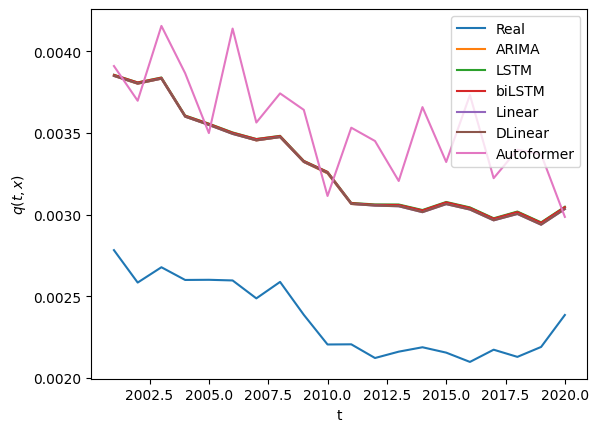

In [72]:
#50
import matplotlib.pyplot as plt
plt.plot(test_50['Year'], test_50['Female_q'], label = "Real")
plt.plot(test_50['Year'], ARIMA_50['Female_q'], label = "ARIMA")
plt.plot(test_50['Year'], LSTM_50_fm['Female_q'], label = "LSTM")
plt.plot(test_50['Year'], biLSTM_50_fm['Female_q'], label = "biLSTM")
plt.plot(test_50['Year'], LTSF_50_fm['Female_q'], label = "Linear")
plt.plot(test_50['Year'], LTSF_D_50_fm['Female_q'], label = "DLinear")
plt.plot(test_50['Year'], autoformer_50_fm['Female_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

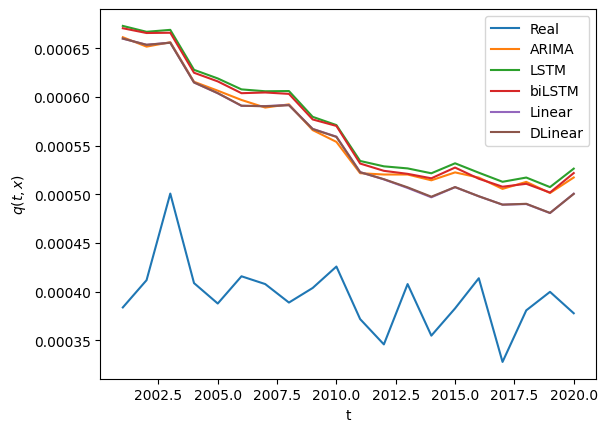

In [67]:
#30
import matplotlib.pyplot as plt
plt.plot(test_30['Year'], test_30['Female_q'], label = "Real")
plt.plot(test_30['Year'], ARIMA_30['Female_q'], label = "ARIMA")
plt.plot(test_30['Year'], LSTM_30_fm['Female_q'], label = "LSTM")
plt.plot(test_30['Year'], biLSTM_30_fm['Female_q'], label = "biLSTM")
plt.plot(test_30['Year'], LTSF_30_fm['Female_q'], label = "Linear")
plt.plot(test_30['Year'], LTSF_D_30_fm['Female_q'], label = "DLinear")
#plt.plot(test_30['Year'], autoformer_30_fm['Female_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

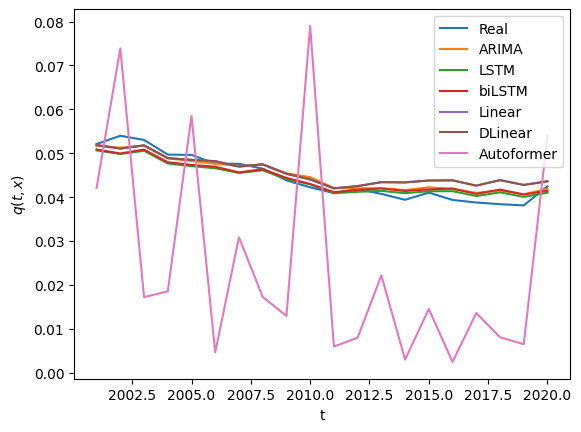

In [82]:
import matplotlib.pyplot as plt
plt.plot(test_80['Year'], test_80['Female_q'], label = "Real")
plt.plot(test_80['Year'], ARIMA_80['Female_q'], label = "ARIMA")
plt.plot(test_80['Year'], LSTM_80_fm['Female_q'], label = "LSTM")
plt.plot(test_80['Year'], biLSTM_80_fm['Female_q'], label = "biLSTM")
plt.plot(test_80['Year'], LTSF_80_fm['Female_q'], label = "Linear")
plt.plot(test_80['Year'], LTSF_D_80_fm['Female_q'], label = "DLinear")
plt.plot(test_80['Year'], autoformer_80_fm['Female_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

### plot for male

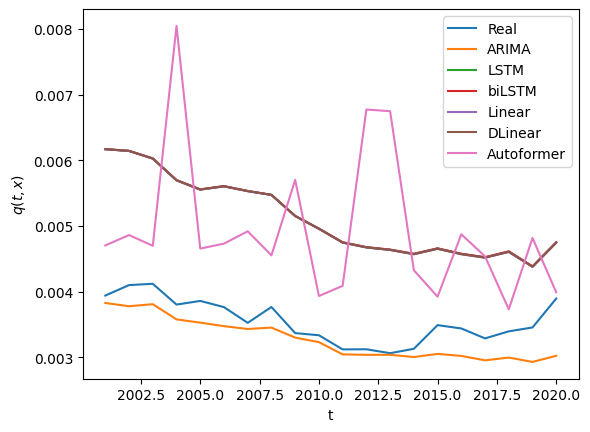

In [73]:
#50
import matplotlib.pyplot as plt
plt.plot(test_50['Year'], test_50['Male_q'], label = "Real")
plt.plot(test_50['Year'], ARIMA_50['Male_q'], label = "ARIMA")
plt.plot(test_50['Year'], LSTM_50_m['Male_q'], label = "LSTM")
plt.plot(test_50['Year'], biLSTM_50_m['Male_q'], label = "biLSTM")
plt.plot(test_50['Year'], LTSF_50_m['Male_q'], label = "Linear")
plt.plot(test_50['Year'], LTSF_D_50_m['Male_q'], label = "DLinear")
plt.plot(test_50['Year'], autoformer_50_m['Male_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

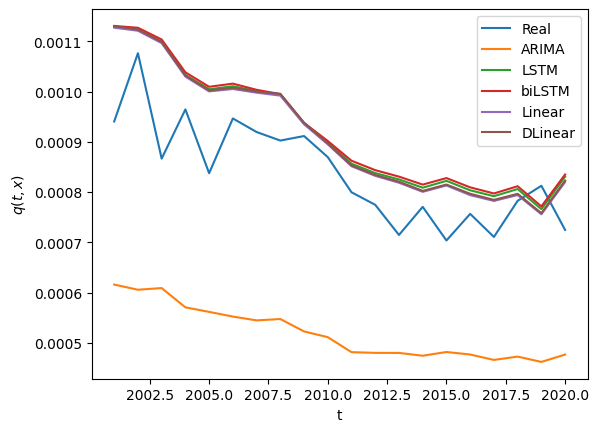

In [69]:
#30
import matplotlib.pyplot as plt
plt.plot(test_30['Year'], test_30['Male_q'], label = "Real")
plt.plot(test_30['Year'], ARIMA_30['Male_q'], label = "ARIMA")
plt.plot(test_30['Year'], LSTM_30_m['Male_q'], label = "LSTM")
plt.plot(test_30['Year'], biLSTM_30_m['Male_q'], label = "biLSTM")
plt.plot(test_30['Year'], LTSF_30_m['Male_q'], label = "Linear")
plt.plot(test_30['Year'], LTSF_D_30_m['Male_q'], label = "DLinear")
#plt.plot(test_30['Year'], autoformer_30_m['Male_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

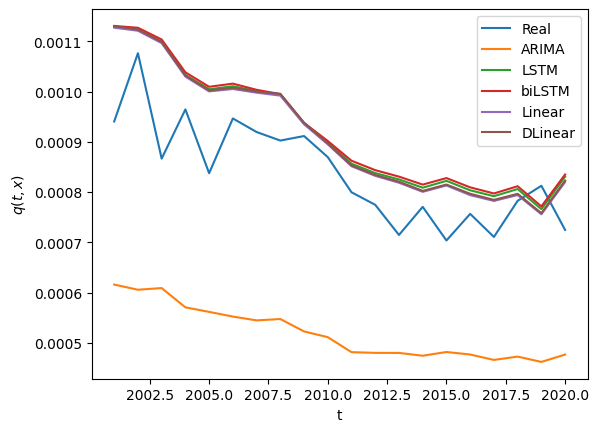

In [36]:
import matplotlib.pyplot as plt
plt.plot(test_30['Year'], test_30['Male_q'], label = "Real")
plt.plot(test_30['Year'], ARIMA_30['Male_q'], label = "ARIMA")
plt.plot(test_30['Year'], LSTM_30_m['Male_q'], label = "LSTM")
plt.plot(test_30['Year'], biLSTM_30_m['Male_q'], label = "biLSTM")
plt.plot(test_30['Year'], LTSF_30_m['Male_q'], label = "Linear")
plt.plot(test_30['Year'], LTSF_D_30_m['Male_q'], label = "DLinear")
#plt.plot(test_30['Year'], autoformer_30_m['Male_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

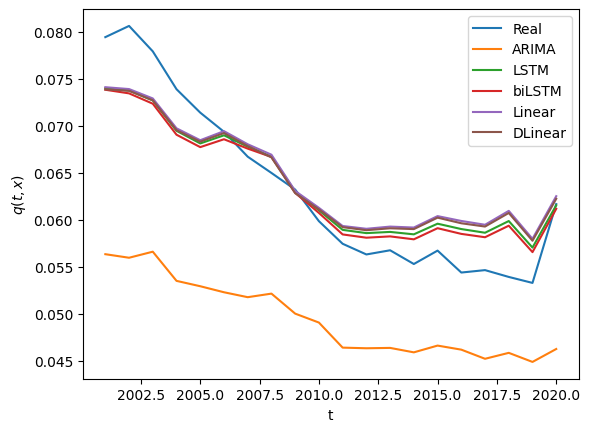

In [78]:
import matplotlib.pyplot as plt
plt.plot(test_80['Year'], test_80['Male_q'], label = "Real")
plt.plot(test_80['Year'], ARIMA_80['Male_q'], label = "ARIMA")
plt.plot(test_80['Year'], LSTM_80_m['Male_q'], label = "LSTM")
plt.plot(test_80['Year'], biLSTM_80_m['Male_q'], label = "biLSTM")
plt.plot(test_80['Year'], LTSF_80_m['Male_q'], label = "Linear")
plt.plot(test_80['Year'], LTSF_D_80_m['Male_q'], label = "DLinear")
#plt.plot(test_80['Year'], autoformer_80_m['Male_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

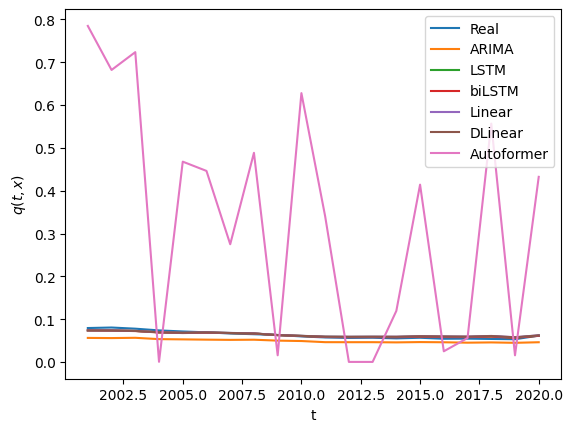

In [81]:
import matplotlib.pyplot as plt
plt.plot(test_80['Year'], test_80['Male_q'], label = "Real")
plt.plot(test_80['Year'], ARIMA_80['Male_q'], label = "ARIMA")
plt.plot(test_80['Year'], LSTM_80_m['Male_q'], label = "LSTM")
plt.plot(test_80['Year'], biLSTM_80_m['Male_q'], label = "biLSTM")
plt.plot(test_80['Year'], LTSF_80_m['Male_q'], label = "Linear")
plt.plot(test_80['Year'], LTSF_D_80_m['Male_q'], label = "DLinear")
plt.plot(test_80['Year'], autoformer_80_m['Male_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

### plot for total

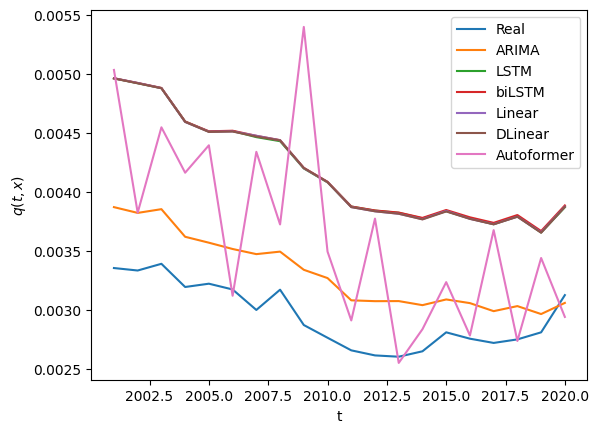

In [74]:
import matplotlib.pyplot as plt
plt.plot(test_50['Year'], test_50['Total_q'], label = "Real")
plt.plot(test_50['Year'], ARIMA_50['Total_q'], label = "ARIMA")
plt.plot(test_50['Year'], LSTM_50_t['Male_q'], label = "LSTM")
plt.plot(test_50['Year'], biLSTM_50_t['Male_q'], label = "biLSTM")
plt.plot(test_50['Year'], LTSF_50_t['Male_q'], label = "Linear")
plt.plot(test_50['Year'], LTSF_D_50_t['Male_q'], label = "DLinear")
plt.plot(test_50['Year'], autoformer_50_t['Male_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

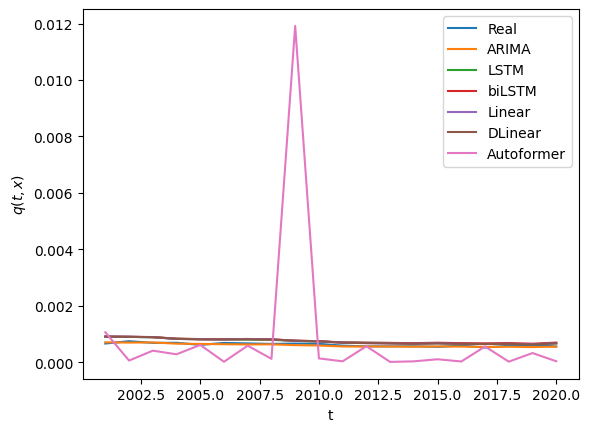

In [70]:
import matplotlib.pyplot as plt
plt.plot(test_30['Year'], test_30['Total_q'], label = "Real")
plt.plot(test_30['Year'], ARIMA_30['Total_q'], label = "ARIMA")
plt.plot(test_30['Year'], LSTM_30_t['Male_q'], label = "LSTM")
plt.plot(test_30['Year'], biLSTM_30_t['Male_q'], label = "biLSTM")
plt.plot(test_30['Year'], LTSF_30_t['Male_q'], label = "Linear")
plt.plot(test_30['Year'], LTSF_D_30_t['Male_q'], label = "DLinear")
plt.plot(test_30['Year'], autoformer_30_t['Male_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

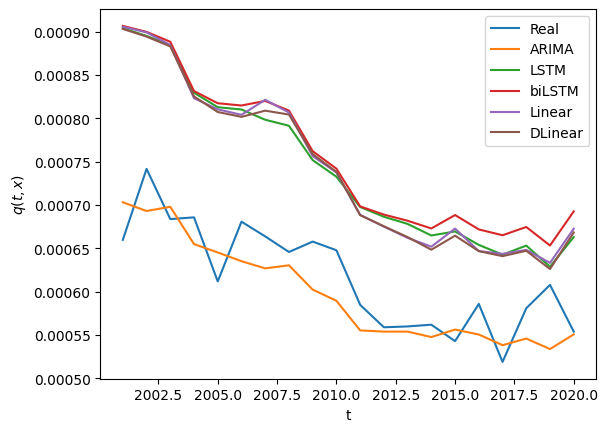

In [71]:
import matplotlib.pyplot as plt
plt.plot(test_30['Year'], test_30['Total_q'], label = "Real")
plt.plot(test_30['Year'], ARIMA_30['Total_q'], label = "ARIMA")
plt.plot(test_30['Year'], LSTM_30_t['Male_q'], label = "LSTM")
plt.plot(test_30['Year'], biLSTM_30_t['Male_q'], label = "biLSTM")
plt.plot(test_30['Year'], LTSF_30_t['Male_q'], label = "Linear")
plt.plot(test_30['Year'], LTSF_D_30_t['Male_q'], label = "DLinear")
#plt.plot(test_30['Year'], autoformer_30_t['Male_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

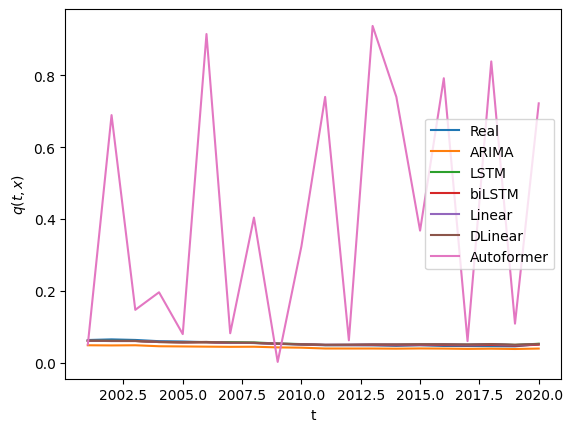

In [80]:
import matplotlib.pyplot as plt
plt.plot(test_80['Year'], test_80['Total_q'], label = "Real")
plt.plot(test_80['Year'], ARIMA_80['Total_q'], label = "ARIMA")
plt.plot(test_80['Year'], LSTM_80_t['Male_q'], label = "LSTM")
plt.plot(test_80['Year'], biLSTM_80_t['Male_q'], label = "biLSTM")
plt.plot(test_80['Year'], LTSF_80_t['Male_q'], label = "Linear")
plt.plot(test_80['Year'], LTSF_D_80_t['Male_q'], label = "DLinear")
plt.plot(test_80['Year'], autoformer_80_t['Male_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

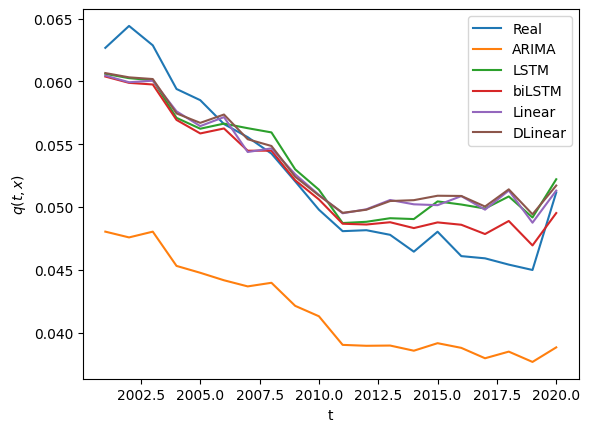

In [79]:
import matplotlib.pyplot as plt
plt.plot(test_80['Year'], test_80['Total_q'], label = "Real")
plt.plot(test_80['Year'], ARIMA_80['Total_q'], label = "ARIMA")
plt.plot(test_80['Year'], LSTM_80_t['Male_q'], label = "LSTM")
plt.plot(test_80['Year'], biLSTM_80_t['Male_q'], label = "biLSTM")
plt.plot(test_80['Year'], LTSF_80_t['Male_q'], label = "Linear")
plt.plot(test_80['Year'], LTSF_D_80_t['Male_q'], label = "DLinear")
#plt.plot(test_80['Year'], autoformer_80_t['Male_q'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.legend()
plt.show()

## Prediction Interval for q(t,x)

### Female

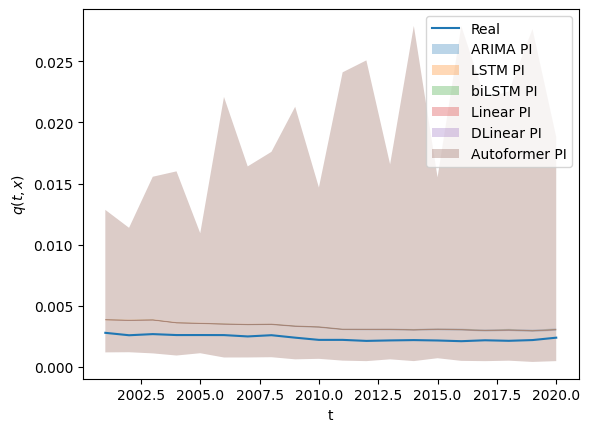

In [179]:
plt.plot(test_50['Year'], test_50['Female_q'], label = "Real")
plt.fill_between(test_50['Year'], ARIMA_50['Female_q_u'], ARIMA_50['Female_q_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(test_50['Year'], LSTM_50_fm['upper_q'], LSTM_50_fm['lower_q'],label='LSTM PI', alpha=0.3)
plt.fill_between(test_50['Year'], biLSTM_50_fm['upper_q'], biLSTM_50_fm['lower_q'],label='biLSTM PI', alpha=0.3)
plt.fill_between(test_50['Year'], LTSF_50_fm['upper_q'], LTSF_50_fm['lower_q'],label='Linear PI', alpha=0.3)
plt.fill_between(test_50['Year'], LTSF_D_50_fm['upper_q'], LTSF_D_50_fm['lower_q'],label='DLinear PI', alpha=0.3)
plt.fill_between(test_50['Year'], autoformer_50_fm['upper_q'], autoformer_50_fm['lower_q'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.show()

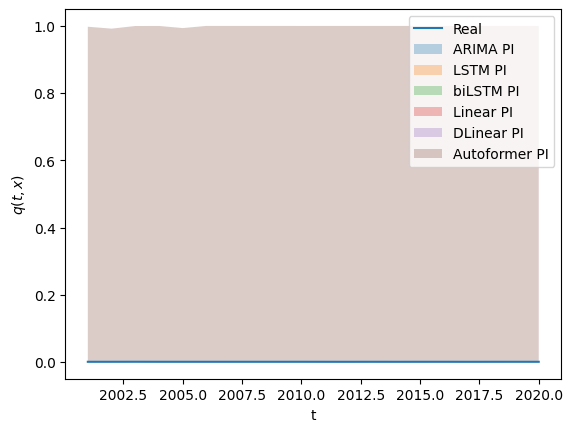

In [184]:
plt.plot(test_30['Year'], test_30['Female_q'], label = "Real")
plt.fill_between(test_30['Year'], ARIMA_30['Female_q_u'], ARIMA_30['Female_q_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(test_30['Year'], LSTM_30_fm['upper_q'], LSTM_30_fm['lower_q'],label='LSTM PI', alpha=0.3)
plt.fill_between(test_30['Year'], biLSTM_30_fm['upper_q'], biLSTM_30_fm['lower_q'],label='biLSTM PI', alpha=0.3)
plt.fill_between(test_30['Year'], LTSF_30_fm['upper_q'], LTSF_30_fm['lower_q'],label='Linear PI', alpha=0.3)
plt.fill_between(test_30['Year'], LTSF_D_30_fm['upper_q'], LTSF_D_30_fm['lower_q'],label='DLinear PI', alpha=0.3)
plt.fill_between(test_30['Year'], autoformer_30_fm['upper_q'], autoformer_30_fm['lower_q'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.show()

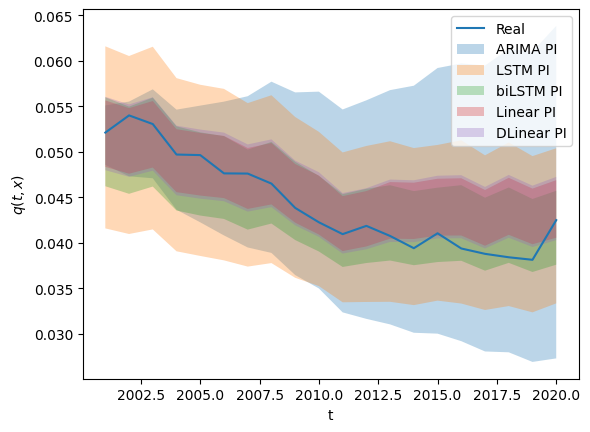

In [193]:
plt.plot(test_80['Year'], test_80['Female_q'], label = "Real")
plt.fill_between(test_80['Year'], ARIMA_80['Female_q_u'], ARIMA_80['Female_q_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(test_80['Year'], LSTM_80_fm['upper_q'], LSTM_80_fm['lower_q'],label='LSTM PI', alpha=0.3)
plt.fill_between(test_80['Year'], biLSTM_80_fm['upper_q'], biLSTM_80_fm['lower_q'],label='biLSTM PI', alpha=0.3)
plt.fill_between(test_80['Year'], LTSF_80_fm['upper_q'], LTSF_80_fm['lower_q'],label='Linear PI', alpha=0.3)
plt.fill_between(test_80['Year'], LTSF_D_80_fm['upper_q'], LTSF_D_80_fm['lower_q'],label='DLinear PI', alpha=0.3)
#plt.fill_between(test_80['Year'], autoformer_80_fm['upper_q'], autoformer_80_fm['lower_q'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.show()

### Male

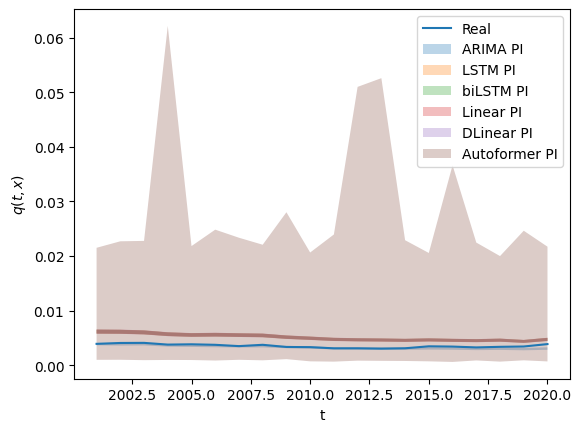

In [180]:
plt.plot(test_50['Year'], test_50['Male_q'], label = "Real")
plt.fill_between(test_50['Year'], ARIMA_50['Male_q_u'], ARIMA_50['Male_q_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(test_50['Year'], LSTM_50_m['upper_q'], LSTM_50_m['lower_q'],label='LSTM PI', alpha=0.3)
plt.fill_between(test_50['Year'], biLSTM_50_m['upper_q'], biLSTM_50_m['lower_q'],label='biLSTM PI', alpha=0.3)
plt.fill_between(test_50['Year'], LTSF_50_m['upper_q'], LTSF_50_m['lower_q'],label='Linear PI', alpha=0.3)
plt.fill_between(test_50['Year'], LTSF_D_50_m['upper_q'], LTSF_D_50_m['lower_q'],label='DLinear PI', alpha=0.3)
plt.fill_between(test_50['Year'], autoformer_50_m['upper_q'], autoformer_50_m['lower_q'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.show()

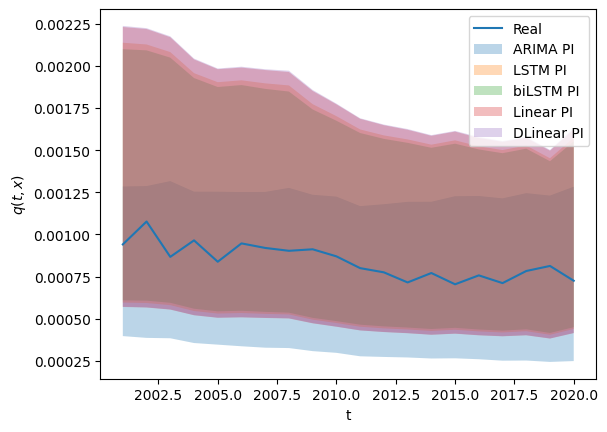

In [187]:
plt.plot(test_30['Year'], test_30['Male_q'], label = "Real")
plt.fill_between(test_30['Year'], ARIMA_30['Male_q_u'], ARIMA_30['Male_q_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(test_30['Year'], LSTM_30_m['upper_q'], LSTM_30_m['lower_q'],label='LSTM PI', alpha=0.3)
plt.fill_between(test_30['Year'], biLSTM_30_m['upper_q'], biLSTM_30_m['lower_q'],label='biLSTM PI', alpha=0.3)
plt.fill_between(test_30['Year'], LTSF_30_m['upper_q'], LTSF_30_m['lower_q'],label='Linear PI', alpha=0.3)
plt.fill_between(test_30['Year'], LTSF_D_30_m['upper_q'], LTSF_D_30_m['lower_q'],label='DLinear PI', alpha=0.3)
#plt.fill_between(test_30['Year'], autoformer_30_m['upper_q'], autoformer_30_m['lower_q'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.show()

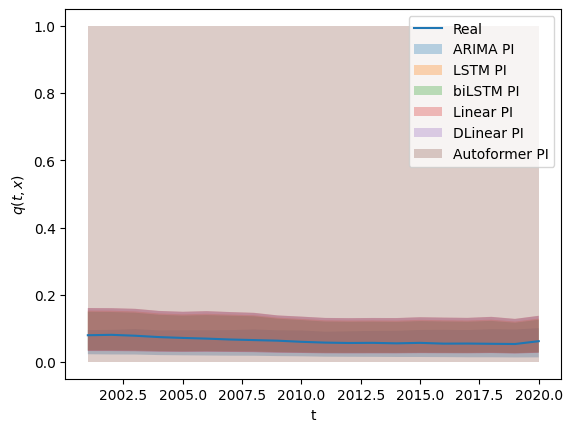

In [195]:
plt.plot(test_80['Year'], test_80['Male_q'], label = "Real")
plt.fill_between(test_80['Year'], ARIMA_80['Male_q_u'], ARIMA_80['Male_q_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(test_80['Year'], LSTM_80_m['upper_q'], LSTM_80_m['lower_q'],label='LSTM PI', alpha=0.3)
plt.fill_between(test_80['Year'], biLSTM_80_m['upper_q'], biLSTM_80_m['lower_q'],label='biLSTM PI', alpha=0.3)
plt.fill_between(test_80['Year'], LTSF_80_m['upper_q'], LTSF_80_m['lower_q'],label='Linear PI', alpha=0.3)
plt.fill_between(test_80['Year'], LTSF_D_80_m['upper_q'], LTSF_D_80_m['lower_q'],label='DLinear PI', alpha=0.3)
plt.fill_between(test_80['Year'], autoformer_80_m['upper_q'], autoformer_80_m['lower_q'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.show()

### Total

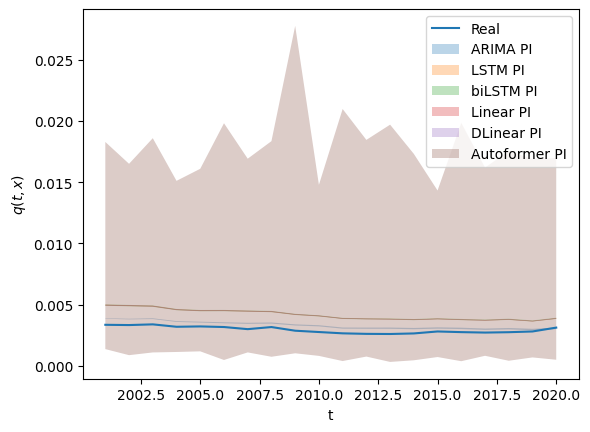

In [181]:
plt.plot(test_50['Year'], test_50['Total_q'], label = "Real")
plt.fill_between(test_50['Year'], ARIMA_50['Total_q_u'], ARIMA_50['Total_q_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(test_50['Year'], LSTM_50_t['upper_q'], LSTM_50_t['lower_q'],label='LSTM PI', alpha=0.3)
plt.fill_between(test_50['Year'], biLSTM_50_t['upper_q'], biLSTM_50_t['lower_q'],label='biLSTM PI', alpha=0.3)
plt.fill_between(test_50['Year'], LTSF_50_t['upper_q'], LTSF_50_t['lower_q'],label='Linear PI', alpha=0.3)
plt.fill_between(test_50['Year'], LTSF_D_50_t['upper_q'], LTSF_D_50_t['lower_q'],label='DLinear PI', alpha=0.3)
plt.fill_between(test_50['Year'], autoformer_50_t['upper_q'], autoformer_50_t['lower_q'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.show()

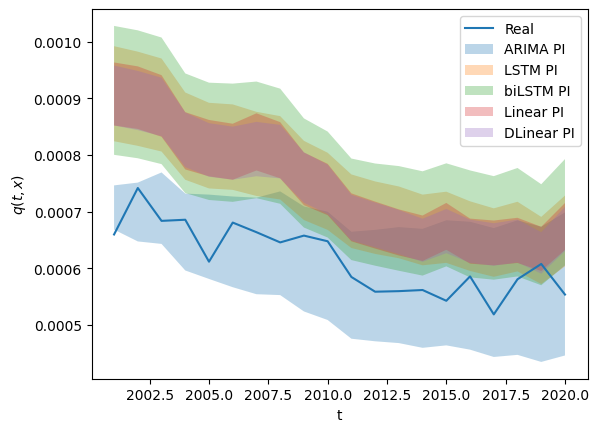

In [189]:
plt.plot(test_30['Year'], test_30['Total_q'], label = "Real")
plt.fill_between(test_30['Year'], ARIMA_30['Total_q_u'], ARIMA_30['Total_q_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(test_30['Year'], LSTM_30_t['upper_q'], LSTM_30_t['lower_q'],label='LSTM PI', alpha=0.3)
plt.fill_between(test_30['Year'], biLSTM_30_t['upper_q'], biLSTM_30_t['lower_q'],label='biLSTM PI', alpha=0.3)
plt.fill_between(test_30['Year'], LTSF_30_t['upper_q'], LTSF_30_t['lower_q'],label='Linear PI', alpha=0.3)
plt.fill_between(test_30['Year'], LTSF_D_30_t['upper_q'], LTSF_D_30_t['lower_q'],label='DLinear PI', alpha=0.3)
#plt.fill_between(test_30['Year'], autoformer_30_t['upper_q'], autoformer_30_t['lower_q'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.show()

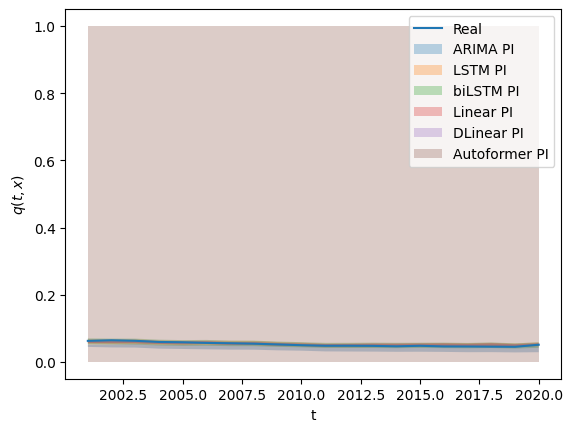

In [191]:
plt.plot(test_80['Year'], test_80['Total_q'], label = "Real")
plt.fill_between(test_80['Year'], ARIMA_80['Total_q_u'], ARIMA_80['Total_q_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(test_80['Year'], LSTM_80_t['upper_q'], LSTM_80_t['lower_q'],label='LSTM PI', alpha=0.3)
plt.fill_between(test_80['Year'], biLSTM_80_t['upper_q'], biLSTM_80_t['lower_q'],label='biLSTM PI', alpha=0.3)
plt.fill_between(test_80['Year'], LTSF_80_t['upper_q'], LTSF_80_t['lower_q'],label='Linear PI', alpha=0.3)
plt.fill_between(test_80['Year'], LTSF_D_80_t['upper_q'], LTSF_D_80_t['lower_q'],label='DLinear PI', alpha=0.3)
plt.fill_between(test_80['Year'], autoformer_80_t['upper_q'], autoformer_80_t['lower_q'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('$q(t,x)$')
plt.legend()
plt.show()

## plot ${k}_{t}^{2}$

### Female

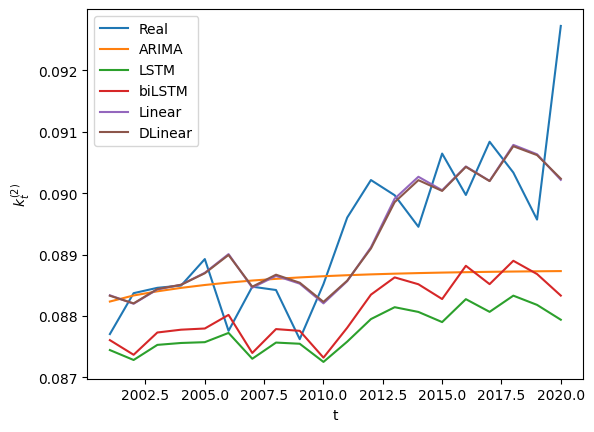

In [39]:
import matplotlib.pyplot as plt
plt.plot(fm_params['Year'][79:], fm_params['K2'][79:], label = "Real")
plt.plot(fm_params['Year'][79:], ARIMA['Female'], label = "ARIMA")
plt.plot(fm_params['Year'][79:], LSTM_fm['average'], label = "LSTM")
plt.plot(fm_params['Year'][79:], biLSTM_fm['average'], label = "biLSTM")
plt.plot(fm_params['Year'][79:], LTSF_fm['average'], label = "Linear")
plt.plot(fm_params['Year'][79:], LTSF_D_fm['average'], label = "DLinear")
#plt.plot(fm_params['Year'][79:], autoformer_fm['average'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

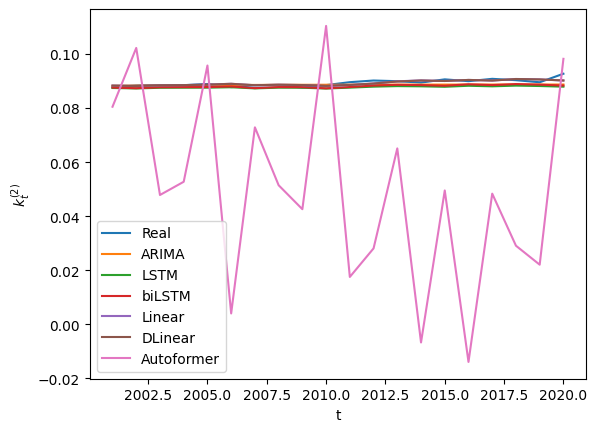

In [61]:
import matplotlib.pyplot as plt
plt.plot(fm_params['Year'][79:], fm_params['K2'][79:], label = "Real")
plt.plot(fm_params['Year'][79:], ARIMA['Female'], label = "ARIMA")
plt.plot(fm_params['Year'][79:], LSTM_fm['average'], label = "LSTM")
plt.plot(fm_params['Year'][79:], biLSTM_fm['average'], label = "biLSTM")
plt.plot(fm_params['Year'][79:], LTSF_fm['average'], label = "Linear")
plt.plot(fm_params['Year'][79:], LTSF_D_fm['average'], label = "DLinear")
plt.plot(fm_params['Year'][79:], autoformer_fm['average'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

### Male

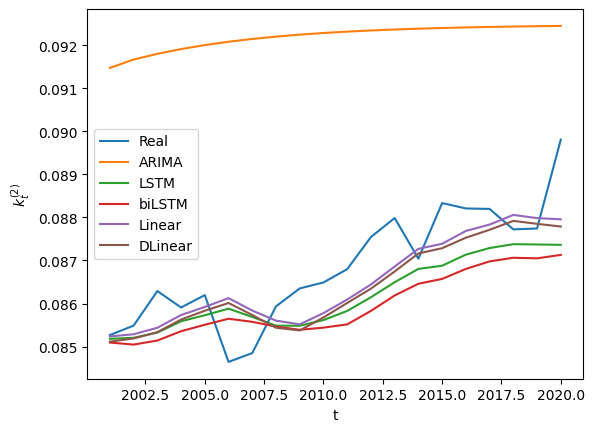

In [62]:
import matplotlib.pyplot as plt
plt.plot(m_params['Year'][79:], m_params['K2'][79:], label = "Real")
plt.plot(m_params['Year'][79:], ARIMA['Male'], label = "ARIMA")
plt.plot(m_params['Year'][79:], LSTM_m['average'], label = "LSTM")
plt.plot(m_params['Year'][79:], biLSTM_m['average'], label = "biLSTM")
plt.plot(m_params['Year'][79:], LTSF_m['average'], label = "Linear")
plt.plot(m_params['Year'][79:], LTSF_D_m['average'], label = "DLinear")
#plt.plot(m_params['Year'][79:], autoformer_m['average'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

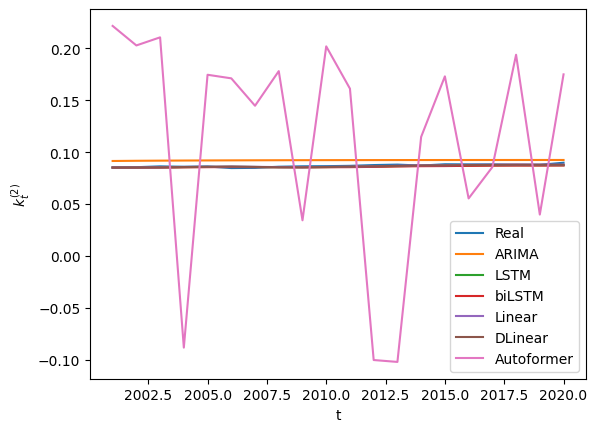

In [63]:
import matplotlib.pyplot as plt
plt.plot(m_params['Year'][79:], m_params['K2'][79:], label = "Real")
plt.plot(m_params['Year'][79:], ARIMA['Male'], label = "ARIMA")
plt.plot(m_params['Year'][79:], LSTM_m['average'], label = "LSTM")
plt.plot(m_params['Year'][79:], biLSTM_m['average'], label = "biLSTM")
plt.plot(m_params['Year'][79:], LTSF_m['average'], label = "Linear")
plt.plot(m_params['Year'][79:], LTSF_D_m['average'], label = "DLinear")
plt.plot(m_params['Year'][79:], autoformer_m['average'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

### Total

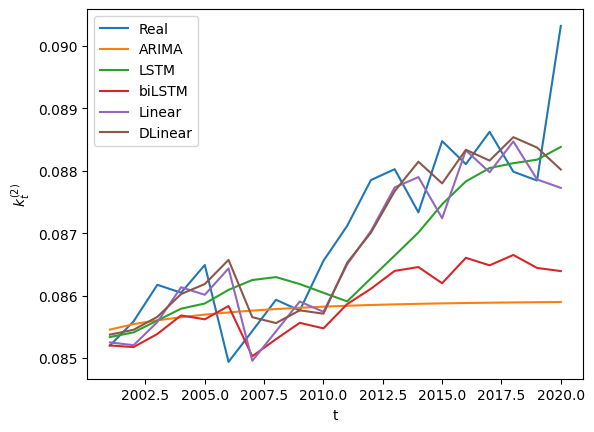

In [64]:
import matplotlib.pyplot as plt
plt.plot(t_params['Year'][79:], t_params['K2'][79:], label = "Real")
plt.plot(t_params['Year'][79:], ARIMA['Total'], label = "ARIMA")
plt.plot(t_params['Year'][79:], LSTM_t['average'], label = "LSTM")
plt.plot(t_params['Year'][79:], biLSTM_t['average'], label = "biLSTM")
plt.plot(t_params['Year'][79:], LTSF_t['average'], label = "Linear")
plt.plot(t_params['Year'][79:], LTSF_D_t['average'], label = "DLinear")
#plt.plot(t_params['Year'][79:], autoformer_t['average'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

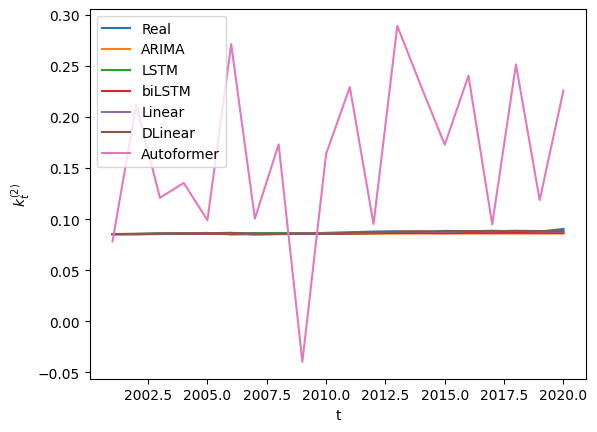

In [65]:
import matplotlib.pyplot as plt
plt.plot(t_params['Year'][79:], t_params['K2'][79:], label = "Real")
plt.plot(t_params['Year'][79:], ARIMA['Total'], label = "ARIMA")
plt.plot(t_params['Year'][79:], LSTM_t['average'], label = "LSTM")
plt.plot(t_params['Year'][79:], biLSTM_t['average'], label = "biLSTM")
plt.plot(t_params['Year'][79:], LTSF_t['average'], label = "Linear")
plt.plot(t_params['Year'][79:], LTSF_D_t['average'], label = "DLinear")
plt.plot(t_params['Year'][79:], autoformer_t['average'], label = "Autoformer")
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

### Prediction Interval for ${k}_{t}^{2}$

### Female

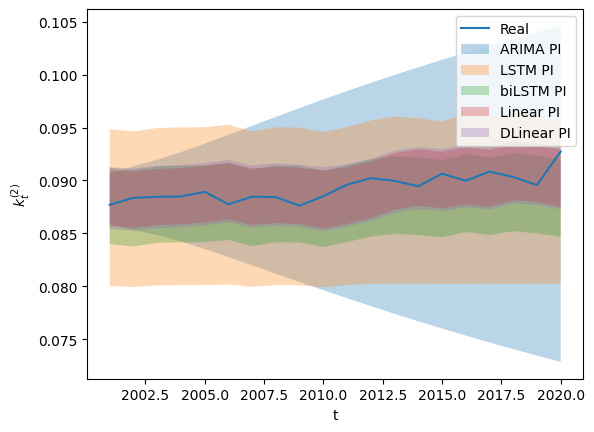

In [165]:
plt.plot(fm_params['Year'][79:], fm_params['K2'][79:], label = "Real")
plt.fill_between(fm_params['Year'][79:], ARIMA['Female_u'], ARIMA['Female_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(fm_params['Year'][79:], LSTM_fm['upper_bound'], LSTM_fm['lower_bound'],label='LSTM PI', alpha=0.3)
plt.fill_between(fm_params['Year'][79:], biLSTM_fm['upper_bound'], biLSTM_fm['lower_bound'],label='biLSTM PI', alpha=0.3)
plt.fill_between(fm_params['Year'][79:], LTSF_fm['upper_bound'], LTSF_fm['lower_bound'],label='Linear PI', alpha=0.3)
plt.fill_between(fm_params['Year'][79:], LTSF_D_fm['upper_bound'], LTSF_D_fm['lower_bound'],label='DLinear PI', alpha=0.3)
#plt.fill_between(fm_params['Year'][79:], autoformer_fm['upper_bound'], autoformer_fm['lower_bound'],label='Autoformer', alpha=0.3)
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

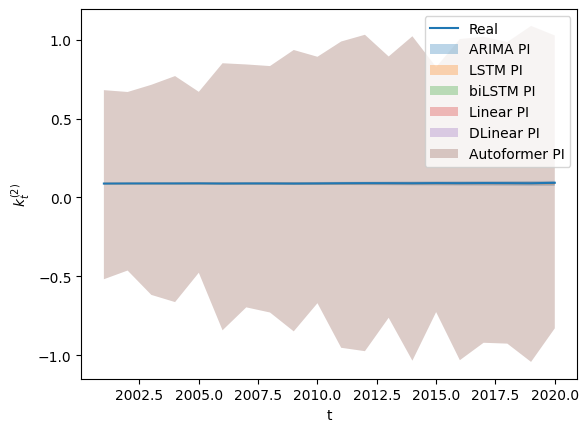

In [166]:
plt.plot(fm_params['Year'][79:], fm_params['K2'][79:], label = "Real")
plt.fill_between(fm_params['Year'][79:], ARIMA['Female_u'], ARIMA['Female_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(fm_params['Year'][79:], LSTM_fm['upper_bound'], LSTM_fm['lower_bound'],label='LSTM PI', alpha=0.3)
plt.fill_between(fm_params['Year'][79:], biLSTM_fm['upper_bound'], biLSTM_fm['lower_bound'],label='biLSTM PI', alpha=0.3)
plt.fill_between(fm_params['Year'][79:], LTSF_fm['upper_bound'], LTSF_fm['lower_bound'],label='Linear PI', alpha=0.3)
plt.fill_between(fm_params['Year'][79:], LTSF_D_fm['upper_bound'], LTSF_D_fm['lower_bound'],label='DLinear PI', alpha=0.3)
plt.fill_between(fm_params['Year'][79:], autoformer_fm['upper_bound'], autoformer_fm['lower_bound'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

  ### Male

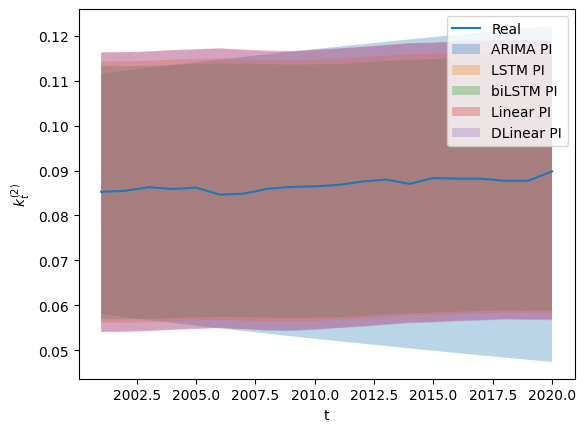

In [167]:
plt.plot(m_params['Year'][79:], m_params['K2'][79:], label = "Real")
plt.fill_between(fm_params['Year'][79:], ARIMA['Male_u'], ARIMA['Male_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(m_params['Year'][79:], LSTM_m['upper_bound'], LSTM_m['lower_bound'],label='LSTM PI', alpha=0.3)
plt.fill_between(m_params['Year'][79:], biLSTM_m['upper_bound'], biLSTM_m['lower_bound'],label='biLSTM PI', alpha=0.3)
plt.fill_between(m_params['Year'][79:], LTSF_m['upper_bound'], LTSF_m['lower_bound'],label='Linear PI', alpha=0.3)
plt.fill_between(m_params['Year'][79:], LTSF_D_m['upper_bound'], LTSF_D_m['lower_bound'],label='DLinear PI', alpha=0.3)
#plt.fill_between(fm_params['Year'][79:], autoformer_fm['upper_bound'], autoformer_fm['lower_bound'],label='Autoformer', alpha=0.3)
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

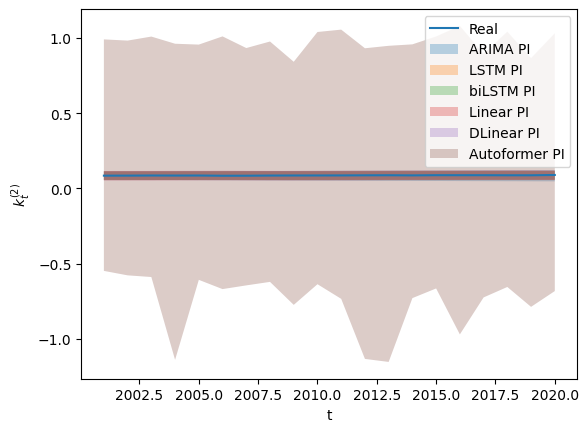

In [168]:
plt.plot(m_params['Year'][79:], m_params['K2'][79:], label = "Real")
plt.fill_between(fm_params['Year'][79:], ARIMA['Male_u'], ARIMA['Male_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(m_params['Year'][79:], LSTM_m['upper_bound'], LSTM_m['lower_bound'],label='LSTM PI', alpha=0.3)
plt.fill_between(m_params['Year'][79:], biLSTM_m['upper_bound'], biLSTM_m['lower_bound'],label='biLSTM PI', alpha=0.3)
plt.fill_between(m_params['Year'][79:], LTSF_m['upper_bound'], LTSF_m['lower_bound'],label='Linear PI', alpha=0.3)
plt.fill_between(m_params['Year'][79:], LTSF_D_m['upper_bound'], LTSF_D_m['lower_bound'],label='DLinear PI', alpha=0.3)
plt.fill_between(m_params['Year'][79:], autoformer_m['upper_bound'], autoformer_m['lower_bound'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

### Total

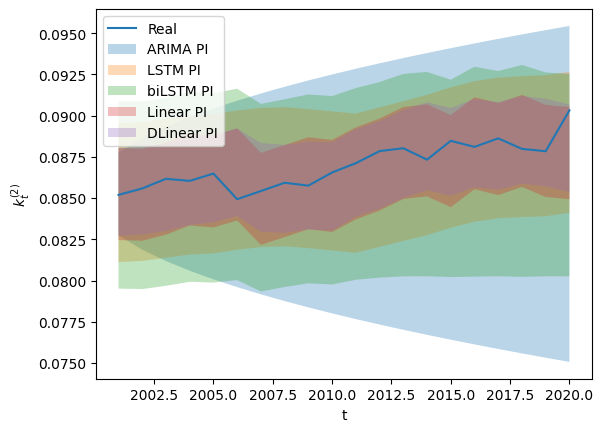

In [169]:
plt.plot(t_params['Year'][79:], t_params['K2'][79:], label = "Real")
plt.fill_between(fm_params['Year'][79:], ARIMA['Total_u'], ARIMA['Total_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(t_params['Year'][79:], LSTM_t['upper_bound'], LSTM_t['lower_bound'],label='LSTM PI', alpha=0.3)
plt.fill_between(t_params['Year'][79:], biLSTM_t['upper_bound'], biLSTM_t['lower_bound'],label='biLSTM PI', alpha=0.3)
plt.fill_between(t_params['Year'][79:], LTSF_t['upper_bound'], LTSF_t['lower_bound'],label='Linear PI', alpha=0.3)
plt.fill_between(t_params['Year'][79:], LTSF_D_t['upper_bound'], LTSF_D_t['lower_bound'],label='DLinear PI', alpha=0.3)
#plt.fill_between(fm_params['Year'][79:], autoformer_fm['upper_bound'], autoformer_fm['lower_bound'],label='Autoformer', alpha=0.3)
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

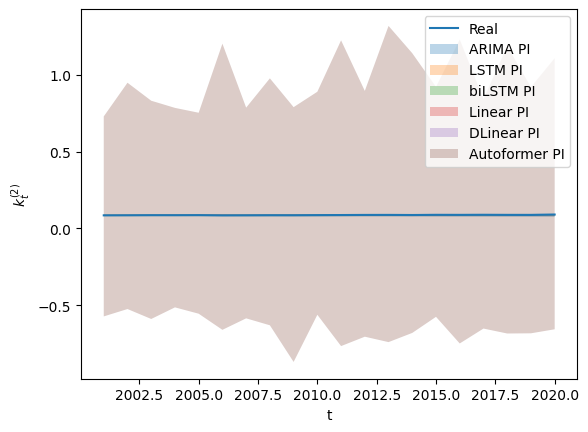

In [170]:
plt.plot(t_params['Year'][79:], t_params['K2'][79:], label = "Real")
plt.fill_between(fm_params['Year'][79:], ARIMA['Total_u'], ARIMA['Total_l'],label='ARIMA PI', alpha=0.3)
plt.fill_between(t_params['Year'][79:], LSTM_t['upper_bound'], LSTM_t['lower_bound'],label='LSTM PI', alpha=0.3)
plt.fill_between(t_params['Year'][79:], biLSTM_t['upper_bound'], biLSTM_t['lower_bound'],label='biLSTM PI', alpha=0.3)
plt.fill_between(t_params['Year'][79:], LTSF_t['upper_bound'], LTSF_t['lower_bound'],label='Linear PI', alpha=0.3)
plt.fill_between(t_params['Year'][79:], LTSF_D_t['upper_bound'], LTSF_D_t['lower_bound'],label='DLinear PI', alpha=0.3)
plt.fill_between(t_params['Year'][79:], autoformer_t['upper_bound'], autoformer_t['lower_bound'],label='Autoformer PI', alpha=0.3)
plt.xlabel('t')
plt.ylabel('${k}_{t}^{(2)}$')
plt.legend()
plt.show()

### metric evalution

### Female

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE_fm = mean_absolute_error(LSTM_fm['average'].values, fm_params['K2'][79:].values)
MAE_fm_1 = mean_absolute_error(biLSTM_fm['average'].values, fm_params['K2'][79:].values)
MAE_fm_2 = mean_absolute_error(LTSF_fm['average'].values, fm_params['K2'][79:].values)
MAE_fm_3 = mean_absolute_error(LTSF_D_fm['average'].values, fm_params['K2'][79:].values)
MAE_fm_4 = mean_absolute_error(autoformer_fm['average'].values, fm_params['K2'][79:].values)

In [24]:
MAE_fm = mean_absolute_error(LSTM_fm_q['Female_q'].values, df_test['Female_q'].values)
MAE_fm_1 = mean_absolute_error(biLSTM_fm_q['Female_q'].values, df_test['Female_q'].values)
MAE_fm_2 = mean_absolute_error(LTSF_fm_q['Female_q'].values, df_test['Female_q'].values)
MAE_fm_3 = mean_absolute_error(LTSF_D_fm_q['Female_q'].values, df_test['Female_q'].values)
MAE_fm_4 = mean_absolute_error(autoformer_fm_q['Female_q'].values, df_test['Female_q'].values)

In [26]:
MAE_fm

0.01743973804712679

In [27]:
MAE_fm_1

0.017124784149059945

In [25]:
MAE_fm_2

0.01588756635470139

In [28]:
MAE_fm_3

0.015892483312541675

In [29]:
MAE_fm_4

0.03672625276551404

In [ ]:
import numpy as np
RMSE_fm = np.sqrt(mean_squared_error(LSTM_fm['average'].values, fm_params['K2'][79:].values))
RMSE_fm_1 = np.sqrt(mean_squared_error(biLSTM_fm['average'].values, fm_params['K2'][79:].values))
RMSE_fm_2 = np.sqrt(mean_squared_error(LTSF_fm['average'].values, fm_params['K2'][79:].values))
RMSE_fm_3 = np.sqrt(mean_squared_error(LTSF_D_fm['average'].values, fm_params['K2'][79:].values))
RMSE_fm_4 = np.sqrt(mean_squared_error(autoformer_fm['average'].values, fm_params['K2'][79:].values))

In [ ]:
RMSE_fm = np.sqrt(mean_squared_error(LSTM_fm_q['Female_q'].values, df_test['Female_q'].values))
RMSE_fm_1 = np.sqrt(mean_squared_error(biLSTM_fm_q['Female_q'].values, df_test['Female_q'].values))
RMSE_fm_2 = np.sqrt(mean_squared_error(LTSF_fm_q['Female_q'].values, df_test['Female_q'].values))
RMSE_fm_3 = np.sqrt(mean_squared_error(LTSF_D_fm_q['Female_q'].values, df_test['Female_q'].values))
RMSE_fm_4 = np.sqrt(mean_squared_error(autoformer_fm_q['Female_q'].values, df_test['Female_q'].values))

In [ ]:
RMSE_fm

0.04326047111429898

In [ ]:
RMSE_fm_1

0.0424394611062983

In [ ]:
RMSE_fm_2

0.039209329943754145

In [ ]:
RMSE_fm_3

0.039222474110774175

In [ ]:
RMSE_fm_4

0.09087334914331503

### Male

In [ ]:
MAE_m = mean_absolute_error(LSTM_m['average'].values, m_params['K2'][79:].values)
MAE_m_1 = mean_absolute_error(biLSTM_m['average'].values, m_params['K2'][79:].values)
MAE_m_2 = mean_absolute_error(LTSF_m['average'].values, m_params['K2'][79:].values)
MAE_m_3 = mean_absolute_error(LTSF_D_m['average'].values, m_params['K2'][79:].values)
MAE_m_4 = mean_absolute_error(autoformer_m['average'].values, m_params['K2'][79:].values)

In [ ]:
MAE_m = mean_absolute_error(LSTM_m_q['Male_q'].values, df_test['Male_q'].values)
MAE_m_1 = mean_absolute_error(biLSTM_m_q['Male_q'].values, df_test['Male_q'].values)
MAE_m_2 = mean_absolute_error(LTSF_m_q['Male_q'].values, df_test['Male_q'].values)
MAE_m_3 = mean_absolute_error(LTSF_D_m_q['Male_q'].values, df_test['Male_q'].values)
MAE_m_4 = mean_absolute_error(autoformer_m_q['Male_q'].values, df_test['Male_q'].values)

In [ ]:
MAE_m

0.01542651358732899

In [ ]:
MAE_m_1

0.01571491106548

In [ ]:
MAE_m_2

0.015051122370445326

In [ ]:
MAE_m_3

0.015200906933037224

In [ ]:
MAE_m_4

0.13273571844488444

In [ ]:
RMSE_m = np.sqrt(mean_squared_error(LSTM_m['average'].values, m_params['K2'][79:].values))
RMSE_m_1 = np.sqrt(mean_squared_error(biLSTM_m['average'].values, m_params['K2'][79:].values))
RMSE_m_2 = np.sqrt(mean_squared_error(LTSF_m['average'].values, m_params['K2'][79:].values))
RMSE_m_3 = np.sqrt(mean_squared_error(LTSF_D_m['average'].values, m_params['K2'][79:].values))
RMSE_m_4 = np.sqrt(mean_squared_error(autoformer_m['average'].values, m_params['K2'][79:].values))

In [ ]:
RMSE_m = np.sqrt(mean_squared_error(LSTM_m_q['Male_q'].values, df_test['Male_q'].values))
RMSE_m_1 = np.sqrt(mean_squared_error(biLSTM_m_q['Male_q'].values, df_test['Male_q'].values))
RMSE_m_2 = np.sqrt(mean_squared_error(LTSF_m_q['Male_q'].values, df_test['Male_q'].values))
RMSE_m_3 = np.sqrt(mean_squared_error(LTSF_D_m_q['Male_q'].values, df_test['Male_q'].values))
RMSE_m_4 = np.sqrt(mean_squared_error(autoformer_m_q['Male_q'].values, df_test['Male_q'].values))

In [ ]:
RMSE_m

0.037005309797008536

In [ ]:
RMSE_m_1

0.037726940938061684

In [ ]:
RMSE_m_2

0.0360228493873232

In [ ]:
RMSE_m_3

0.03639116107396637

In [ ]:
RMSE_m_4

0.25508721120247657

### Total

In [ ]:
MAE_t = mean_absolute_error(LSTM_t['average'].values, t_params['K2'][79:].values)
MAE_t_1 = mean_absolute_error(biLSTM_t['average'].values, t_params['K2'][79:].values)
MAE_t_2 = mean_absolute_error(LTSF_t['average'].values, t_params['K2'][79:].values)
MAE_t_3 = mean_absolute_error(LTSF_D_t['average'].values, t_params['K2'][79:].values)
MAE_t_4 = mean_absolute_error(autoformer_t['average'].values, t_params['K2'][79:].values)

In [ ]:
MAE_t = mean_absolute_error(LSTM_t_q['Male_q'].values, df_test['Total_q'].values)
MAE_t_1 = mean_absolute_error(biLSTM_t_q['Male_q'].values, df_test['Total_q'].values)
MAE_t_2 = mean_absolute_error(LTSF_t_q['Male_q'].values, df_test['Total_q'].values)
MAE_t_3 = mean_absolute_error(LTSF_D_t_q['Male_q'].values, df_test['Total_q'].values)
MAE_t_4 = mean_absolute_error(autoformer_t_q['Male_q'].values, df_test['Total_q'].values)

In [ ]:
MAE_t

0.014690430599310383

In [ ]:
MAE_t_1

0.015513635521318856

In [ ]:
MAE_t_2

0.014664161156925846

In [ ]:
MAE_t_3

0.014485780443929943

In [ ]:
MAE_t_4

0.13201242446613254

In [ ]:
RMSE_t = np.sqrt(mean_squared_error(LSTM_t['average'].values, t_params['K2'][79:].values))
RMSE_t_1 = np.sqrt(mean_squared_error(biLSTM_t['average'].values, t_params['K2'][79:].values))
RMSE_t_2 = np.sqrt(mean_squared_error(LTSF_t['average'].values, t_params['K2'][79:].values))
RMSE_t_3 = np.sqrt(mean_squared_error(LTSF_D_t['average'].values, t_params['K2'][79:].values))
RMSE_t_4 = np.sqrt(mean_squared_error(autoformer_t['average'].values, t_params['K2'][79:].values))

In [ ]:
RMSE_t = np.sqrt(mean_squared_error(LSTM_t_q['Male_q'].values, df_test['Total_q'].values))
RMSE_t_1 = np.sqrt(mean_squared_error(biLSTM_t_q['Male_q'].values, df_test['Total_q'].values))
RMSE_t_2 = np.sqrt(mean_squared_error(LTSF_t_q['Male_q'].values, df_test['Total_q'].values))
RMSE_t_3 = np.sqrt(mean_squared_error(LTSF_D_t_q['Male_q'].values, df_test['Total_q'].values))
RMSE_t_4 = np.sqrt(mean_squared_error(autoformer_t_q['Male_q'].values, df_test['Total_q'].values))

In [ ]:
RMSE_t

0.03559568512789568

In [ ]:
RMSE_t_1

0.03779453802396035

In [ ]:
RMSE_t_2

0.03551019974492903

In [ ]:
RMSE_t_3

0.03504461793030395

In [ ]:
RMSE_t_4

0.28289681903027225

### ARIMA

In [48]:
MAE_fm_5 = mean_absolute_error(ARIMA['Female'].values, fm_params['K2'][79:].values)
MAE_m_5 = mean_absolute_error(ARIMA['Male'].values, m_params['K2'][79:].values)
MAE_t_5 = mean_absolute_error(ARIMA['Total'].values, t_params['K2'][79:].values)

In [52]:
MAE_fm_5 = mean_absolute_error(ARIMA_q['Female_q'].values, df_test['Female_q'].values)
MAE_m_5 = mean_absolute_error(ARIMA_q['Male_q'].values, df_test['Male_q'].values)
MAE_t_5 = mean_absolute_error(ARIMA_q['Total_q'].values, df_test['Total_q'].values)

In [53]:
MAE_fm_5

0.016549244488280705

In [54]:
MAE_m_5

0.020424948976973594

In [56]:
MAE_t_5

0.02130934920343109

In [44]:
RMSE_fm_5 = np.sqrt(mean_squared_error(ARIMA['Female'].values, fm_params['K2'][79:].values))
RMSE_m_5 = np.sqrt(mean_squared_error(ARIMA['Male'].values, m_params['K2'][79:].values))
RMSE_t_5 = np.sqrt(mean_squared_error(ARIMA['Total'].values, t_params['K2'][79:].values))

In [57]:
RMSE_fm_5 = np.sqrt(mean_squared_error(ARIMA_q['Female_q'].values, df_test['Female_q'].values))
RMSE_m_5 = np.sqrt(mean_squared_error(ARIMA_q['Male_q'].values, df_test['Male_q'].values))
RMSE_t_5 = np.sqrt(mean_squared_error(ARIMA_q['Total_q'].values, df_test['Total_q'].values))

In [58]:
RMSE_fm_5

0.04104996444995049

In [59]:
RMSE_m_5

0.04746128950900266

In [60]:
RMSE_t_5

0.05149838401025833

### Prediction Interval evaluation

In [160]:
case1 = ARIMA_q.apply(lambda row: (row['Real_t'] >= row['Total_q_l']) and (row['Real_t'] <= row['Total_q_u']), axis=1).sum()
case2 = ARIMA_q.apply(lambda row: (row['Real_t'] <= row['Total_q_l']) and (row['Real_t'] >= row['Total_q_u']), axis=1).sum()

In [161]:
#PICP
1/2100 * (case1+case2)

0.37666666666666665

In [156]:
#MPIW
(1/2100) *((abs(ARIMA_q['Male_q_u'].values- ARIMA_q['Male_q_l'].values)).sum())

0.07463522952980657